## Observations 
* 1 Based on the data in the summary statistics table, Ramicane on average appears to have the smallest final tumor sizes, relative to other drug regimens tested in this study.
* 2 Based on the data in the summary statistics table, Ketapril on average appears to have the largest final tumor sizes, relative to other drug regimens tested in this study.
* 3 Based on the correlation coefficient of .84, it appears that their is a stong positively correlated relationship between weight and Avg Tumor Volume

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt 
from matplotlib.pylab import rcParams
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set(style='ticks',font='Arial',font_scale=1.2)
rcParams['figure.figsize'] = 12,8
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)

study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_and_study_data_combined = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
# mouse_metadata[("Mouse ID")].count #249 Mouse IDs
# mouse_metadata["Mouse ID"].nunique() #249 Unique Mouse IDs
# study_results[("Mouse ID")].count() # 1893 Study Result Rows 
# study_results["Mouse ID"].nunique() #249 Unique Mouse IDs in Study Results
# mouse_and_study_data_combined[("Mouse ID")].nunique() #249
# mouse_and_study_data_combined THIS CONTAINS A DUP MOUSE ID

In [2]:
# Find only the dups in combined df and insert a column into a new df to be merged back with orig combined and filtered on the new column 
justdupdf = mouse_and_study_data_combined.loc[mouse_and_study_data_combined.duplicated(subset=['Mouse ID', 'Timepoint']), :]
justdupdf.insert(8, 'Duplicate', 'Yes')
justdupdf2 = justdupdf.drop(columns=['Drug Regimen', 'Sex', 'Age_months', 'Weight (g)', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'])
# Combine the justdup data into a single new clean dataset so we can then remove the dups
mouse_and_study_data_combined_clean = pd.merge(mouse_and_study_data_combined, justdupdf2, how="left",on=["Mouse ID", "Mouse ID"])
# locate non-duplicates using loc and keep only those into the new df
mouse_and_study_data_combined_clean2 = mouse_and_study_data_combined_clean.loc[mouse_and_study_data_combined_clean['Duplicate'] !='Yes', ['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 
                                                                                                   'Weight (g)', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites']]
# Run below to confirm Removal of the Mouse ID (248 unique Mouse IDs in new dataframe)
# mouse_and_study_data_combined_clean2["Mouse ID"].nunique() 

## Begin Summary Statistics Prework with DeDuped Data

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
DeDuped_mouse_studydf = mouse_and_study_data_combined_clean2
# DeDuped_mouse_studydf

In [4]:
Summ_Statsdf = DeDuped_mouse_studydf.groupby('Drug Regimen')['Tumor Volume (mm3)'].describe()
Summ_Statsdf2 = Summ_Statsdf.assign(Var=Summ_Statsdf['std'] ** 2)
Summ_Statsdf3 = Summ_Statsdf2.drop(columns=["count", 'min', "25%", "75%", "max"])
Summ_Statsdf4 = Summ_Statsdf3.rename(columns = {'50%':'median'})
Summ_Statsdf5 = Summ_Statsdf4[['mean', 'median', 'Var', 'std']]
# Summ_Statsdf5

In [5]:
DeDuped_pared_df = DeDuped_mouse_studydf[['Drug Regimen', 'Tumor Volume (mm3)']]
semsdf = DeDuped_pared_df.groupby("Drug Regimen").sem()
semsdf2 = semsdf.rename(columns = {'Tumor Volume (mm3)':'SEM'})
# semsdf2

## Summary statistics of tumor volumes for each drug regimen

In [6]:
summarystatsfinal  = pd.merge(Summ_Statsdf5, semsdf2, how="left",on=["Drug Regimen", "Drug Regimen"], suffixes=('', '_y'))
summarystatsfinal

,,mean,median,Var,std,SEM
Drug Regimen,Drug Regimen,,,,,
Capomulin,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts Prework

In [7]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Create an array that contains the number of timepoints for each drug regimen
CountOfTimePointsdf = DeDuped_mouse_studydf[['Drug Regimen', 'Timepoint']]
GroupedCountOfTimePointsdf = CountOfTimePointsdf.groupby("Drug Regimen").count()
# GroupedCountOfTimePointsdf
TimePoints = (GroupedCountOfTimePointsdf['Timepoint'])
DrugsList = GroupedCountOfTimePointsdf.index.tolist()

## Bar Chart Matplotlib

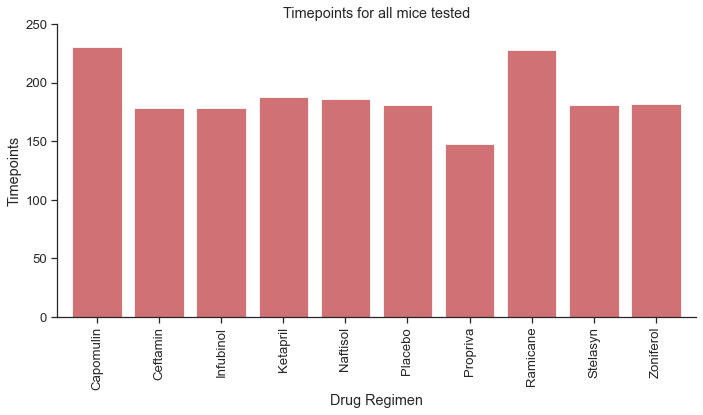

In [8]:
x_axis = np.arange(len(TimePoints))
x_axis
plt.figure(figsize=(10,6))
plt.bar(x_axis, TimePoints, color='r', alpha=0.8, align="center", label = "TimePoints")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"] , rotation="vertical")
plt.title("Timepoints for all mice tested")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
plt.xlim(-0.65, len(x_axis)-0.35)
plt.ylim(0, max(TimePoints)+20)
plt.tight_layout()
plt.show()

## Bar Chart Pandas

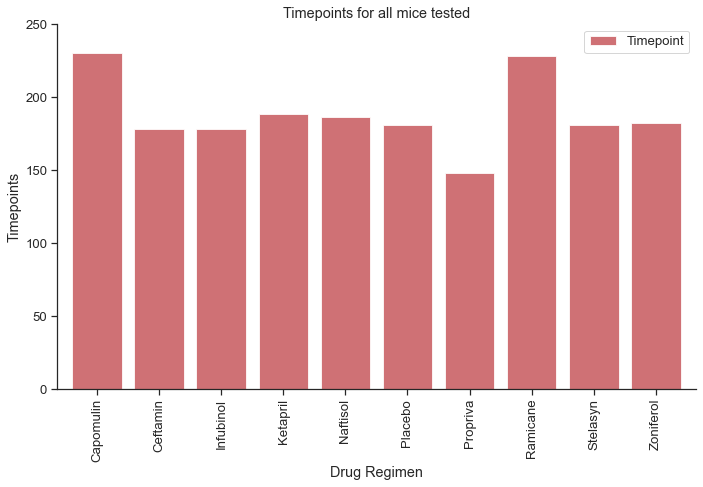

In [9]:
GroupedCountOfTimePointsdf2 = GroupedCountOfTimePointsdf
p_plot_timepoints = GroupedCountOfTimePointsdf2.plot(kind="bar", color = 'r', alpha=0.8, align="center", figsize=(10,7), width = .8)
plt.title("Timepoints for all mice tested")
plt.ylim(0, max(TimePoints)+20)
plt.ylabel("Timepoints")
plt.tight_layout()
plt.show()

## Begin Pie Plot PreWork

In [10]:
# mouse_metadata
# justdupdf2
mouse_meta_mf_df = mouse_metadata.drop(columns=['Drug Regimen', 'Age_months', 'Weight (g)'])
#mouse_meta_mf_df
DeDupedMouseMetaDf = pd.merge(mouse_meta_mf_df, justdupdf2,how="left",on=["Mouse ID", "Mouse ID"])
#DeDupedMouseMetaDf
DeDupedMouseMetaDf2 = DeDupedMouseMetaDf.loc[DeDupedMouseMetaDf['Duplicate'] !='Yes', ['Mouse ID', 'Sex']]
#DeDupedMouseMetaDf2

## Distribution of Male or Female Mice using Matplotlib

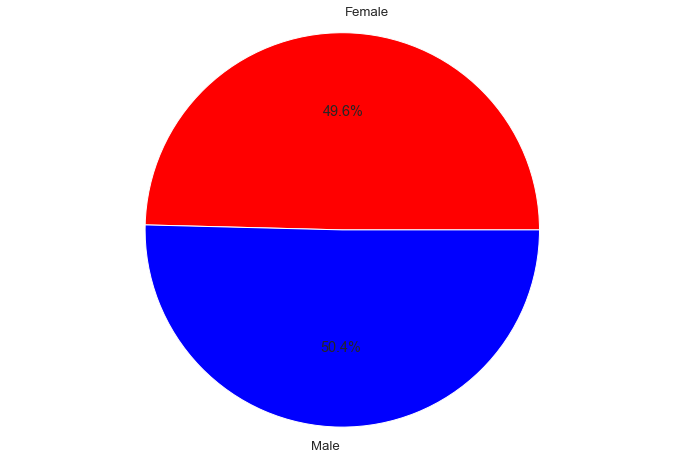

In [11]:
GroupedCountOfMouseSexesdf = DeDupedMouseMetaDf2.groupby("Sex").count()
GroupedCountOfMouseSexesdf
index_val = GroupedCountOfMouseSexesdf.index.values
index_val
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Labels for the sections of our pie chart
# labels = [index_val]
# The values of each section of the pie chart
groups = GroupedCountOfMouseSexesdf[("Mouse ID")]
colors = ["red", "blue"]
plt.pie(groups, labels=index_val, colors=colors,
        autopct="%1.1f%%")
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal");

## Distribution of Male or Female Mice using Pandas

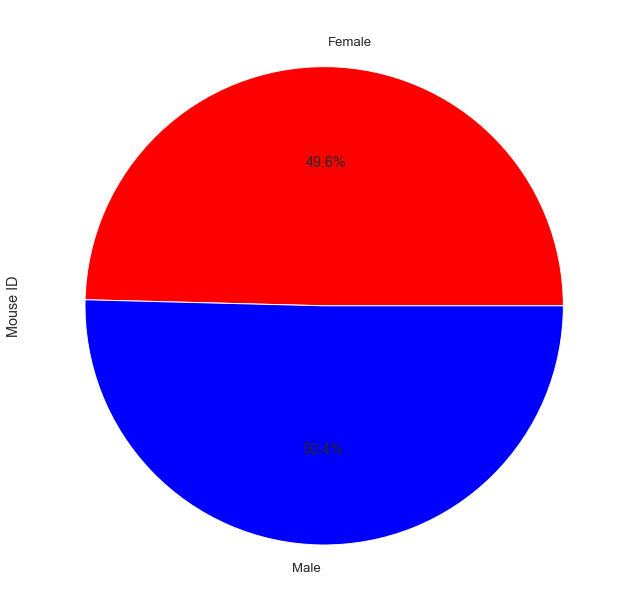

In [12]:
plot = groups.plot.pie(y="Sex", figsize=(11, 11),colors=colors,autopct="%1.1f%%")

In [13]:
# Quartiles, Outliers and Boxplots Prework

In [14]:
#DeDuped_mouse_studydf
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin. use Loc to filter to the 4 drug regimens. keep the Mouse IDs in this DF. PromisingDrugResultsdf
PromisingDrugResultsdf = DeDuped_mouse_studydf.loc[(DeDuped_mouse_studydf['Drug Regimen'] == "Capomulin") |
                                             (DeDuped_mouse_studydf['Drug Regimen'] == "Ramicane") | 
                                             (DeDuped_mouse_studydf['Drug Regimen'] == "Infubinol") |
                                             (DeDuped_mouse_studydf['Drug Regimen'] == "Ceftamin"),
                                             ['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']] 
#PromisingDrugResultsdf

In [15]:
# Start by getting the last (greatest) timepoint for each mouse. For each mouse, group by the max TimePoint. GroupedMaxTimePointsAllDrugs
MouseIDsGrpdForMaxTimePts = DeDuped_mouse_studydf[['Mouse ID', 'Timepoint']]
MaxTimePtsGrpdAll = MouseIDsGrpdForMaxTimePts.groupby("Mouse ID").max()

## Final Tumor Volume of Each Mouse for Capomulin, Ramicane, Infubinol, and Ceftamin

In [16]:
# Merge the above 2 into a 3rd df joining on (Mouse Id and Timepoint) 
MergedDf = pd.merge(PromisingDrugResultsdf, MaxTimePtsGrpdAll, on=['Mouse ID', 'Timepoint'])
MergedDf

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,k403,Ramicane,45,22.050126
1,s185,Capomulin,45,23.343598
2,x401,Capomulin,45,28.484033
3,m601,Capomulin,45,28.430964
4,g791,Ramicane,45,29.128472
...,...,...,...,...
95,x822,Ceftamin,45,61.386660
96,y163,Infubinol,45,67.685569
97,y769,Ceftamin,45,68.594745
98,y865,Ceftamin,45,64.729837


In [17]:
# Create the final Tumor Volumes for the Promising Drug Regimens
MergedDf2 = MergedDf[['Drug Regimen','Tumor Volume (mm3)']]
#MergedDf2

In [18]:
Ramicane_df = MergedDf2.loc[MergedDf2['Drug Regimen'] =='Ramicane', ['Drug Regimen','Tumor Volume (mm3)']]
Capomulin_df = MergedDf2.loc[MergedDf2['Drug Regimen'] =='Capomulin', ['Drug Regimen','Tumor Volume (mm3)']]
Infubinol_df = MergedDf2.loc[MergedDf2['Drug Regimen'] =='Infubinol', ['Drug Regimen','Tumor Volume (mm3)']]
Ceftamin_df = MergedDf2.loc[MergedDf2['Drug Regimen'] =='Ceftamin', ['Drug Regimen','Tumor Volume (mm3)']]
# Capomulin_df

In [19]:
# Put treatments into a list for for loop (and later for plot labels)
PromisingDrugResultsList = PromisingDrugResultsdf['Drug Regimen'].unique()
#PromisingDrugResultsList

In [20]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# If the data is in a dataframe, we use pandas to give quartile calculations
FinalTumorVolumes = MergedDf['Tumor Volume (mm3)']
#FinalTumorVolumes

# Quartiles, IQR and Potential Outliers for each of the 4 most promising treatments

In [21]:
# Create series
Ramicane_FinalTumorVolumes_s = pd.Series(Ramicane_df['Tumor Volume (mm3)'].values) # Ramicane_df , index=df['Date'])
#Ramicane_FinalTumorVolumes_s
Capomulin_FinalTumorVolumes_s = pd.Series(Capomulin_df['Tumor Volume (mm3)'].values) # Capomulin_df , index=df['Date'])
#Capomulin_FinalTumorVolumes_s
Infubinol_FinalTumorVolumes_s = pd.Series(Infubinol_df['Tumor Volume (mm3)'].values) # Infubinol_df , index=df['Date'])
#Infubinol_FinalTumorVolumes_s
Ceftamin_FinalTumorVolumes_s = pd.Series(Ceftamin_df['Tumor Volume (mm3)'].values) # Ceftamin_df , index=df['Date'])
#Ceftamin_FinalTumorVolumes_s

In [26]:
# FinalTumorVolumes
Ramquartiles = Ramicane_FinalTumorVolumes_s.quantile([.25,.5,.75]) # Ramicane_FinalTumorVolumes_s
Ramquartiles

Ramlowerq = Ramquartiles[0.25]
Ramupperq = Ramquartiles[0.75]
Ramiqr = Ramupperq-Ramlowerq
Ramlower_bound = Ramlowerq - (1.5*Ramiqr)
Ramupper_bound = Ramupperq + (1.5*Ramiqr)
print(f"The lower quartile of Final Tumor Volumes for Ramicane is: {Ramlowerq}")
print(f"The upper quartile of Final Tumor Volumes for Ramicane is: {Ramupperq}")
print(f"The interquartile range of Final Tumor Volumes for Ramicane  is: {Ramiqr}")
print(f"The the median of Final Tumor Volumes for Ramicane is: {Ramquartiles[0.5]} ")
print(f"Values below {Ramlower_bound} for Ramicane could be outliers.")
print(f"Values above {Ramupper_bound} for Ramicane could be outliers.")

The lower quartile of Final Tumor Volumes for Ramicane is: 31.56046955
The upper quartile of Final Tumor Volumes for Ramicane is: 40.65900627
The interquartile range of Final Tumor Volumes for Ramicane  is: 9.098536719999998
The the median of Final Tumor Volumes for Ramicane is: 36.56165229 
Values below 17.912664470000003 for Ramicane could be outliers.
Values above 54.30681135 for Ramicane could be outliers.


In [27]:
Capquartiles = Capomulin_FinalTumorVolumes_s.quantile([.25,.5,.75])
Capquartiles

Caplowerq = Capquartiles[0.25]
Capupperq = Capquartiles[0.75]
Capiqr = Capupperq-Caplowerq
Caplower_bound = Caplowerq - (1.5*Capiqr)
Capupper_bound = Capupperq + (1.5*Capiqr)
print(f"The lower quartile of Final Tumor Volumes for Capomulin is: {Caplowerq}")
print(f"The upper quartile of Final Tumor Volumes for Capomulin is: {Capupperq}")
print(f"The interquartile range of Final Tumor Volumes for Capomulin  is: {Capiqr}")
print(f"The the median of Final Tumor Volumes for Capomulin is: {Capquartiles[0.5]} ")
print(f"Values below {Caplower_bound} for Capomulin could be outliers.")
print(f"Values above {Capupper_bound} for Capomulin could be outliers.")

The lower quartile of Final Tumor Volumes for Capomulin is: 32.37735684
The upper quartile of Final Tumor Volumes for Capomulin is: 40.1592203
The interquartile range of Final Tumor Volumes for Capomulin  is: 7.781863460000004
The the median of Final Tumor Volumes for Capomulin is: 38.1251644 
Values below 20.70456164999999 for Capomulin could be outliers.
Values above 51.83201549 for Capomulin could be outliers.


In [28]:
Infquartiles = Infubinol_FinalTumorVolumes_s.quantile([.25,.5,.75])
Infquartiles

Inflowerq = Infquartiles[0.25]
Infupperq = Infquartiles[0.75]
Infiqr = Infupperq-Inflowerq
Inflower_bound = Inflowerq - (1.5*Infiqr)
Infupper_bound = Infupperq + (1.5*Infiqr)
print(f"The lower quartile of Final Tumor Volumes for Infubinol is: {Inflowerq}")
print(f"The upper quartile of Final Tumor Volumes for Infubinol is: {Infupperq}")
print(f"The interquartile range of Final Tumor Volumes for Infubinol  is: {Infiqr}")
print(f"The the median of Final Tumor Volumes for Infubinol is: {Infquartiles[0.5]} ")
print(f"Values below {Inflower_bound} for Infubinol could be outliers.")
print(f"Values above {Infupper_bound} for Infubinol could be outliers.")

The lower quartile of Final Tumor Volumes for Infubinol is: 54.04860769
The upper quartile of Final Tumor Volumes for Infubinol is: 65.52574285
The interquartile range of Final Tumor Volumes for Infubinol  is: 11.477135160000003
The the median of Final Tumor Volumes for Infubinol is: 60.16518046 
Values below 36.83290494999999 for Infubinol could be outliers.
Values above 82.74144559000001 for Infubinol could be outliers.


In [29]:
Cefquartiles = Ceftamin_FinalTumorVolumes_s.quantile([.25,.5,.75])
Cefquartiles

Ceflowerq = Cefquartiles[0.25]
Cefupperq = Cefquartiles[0.75]
Cefiqr = Cefupperq-Ceflowerq
Ceflower_bound = Ceflowerq - (1.5*Cefiqr)
Cefupper_bound = Cefupperq + (1.5*Cefiqr)
print(f"The lower quartile of Final Tumor Volumes for Ceftamin is: {Ceflowerq}")
print(f"The upper quartile of Final Tumor Volumes for Ceftamin is: {Cefupperq}")
print(f"The interquartile range of Final Tumor Volumes for Ceftamin  is: {Cefiqr}")
print(f"The the median of Final Tumor Volumes for Ceftamin is: {Cefquartiles[0.5]} ")
print(f"Values below {Ceflower_bound} for Ceftamin could be outliers.")
print(f"Values above {Cefupper_bound} for Ceftamin could be outliers.")

The lower quartile of Final Tumor Volumes for Ceftamin is: 48.72207785
The upper quartile of Final Tumor Volumes for Ceftamin is: 64.29983003
The interquartile range of Final Tumor Volumes for Ceftamin  is: 15.577752179999997
The the median of Final Tumor Volumes for Ceftamin is: 59.85195552 
Values below 25.355449580000002 for Ceftamin could be outliers.
Values above 87.66645829999999 for Ceftamin could be outliers.


In [30]:
#convert the series into dataframes
Ramicane_FinalTumorVolumes_df = Ramicane_df[['Tumor Volume (mm3)']]
Capomulin_FinalTumorVolumes_df = Capomulin_df[['Tumor Volume (mm3)']]
Infubinol_FinalTumorVolumes_df = Infubinol_df[['Tumor Volume (mm3)']]
Ceftamin_FinalTumorVolumes_df = Ceftamin_df[['Tumor Volume (mm3)']]
#Ceftamin_FinalTumorVolumes_df

## Box and Whisker Plots

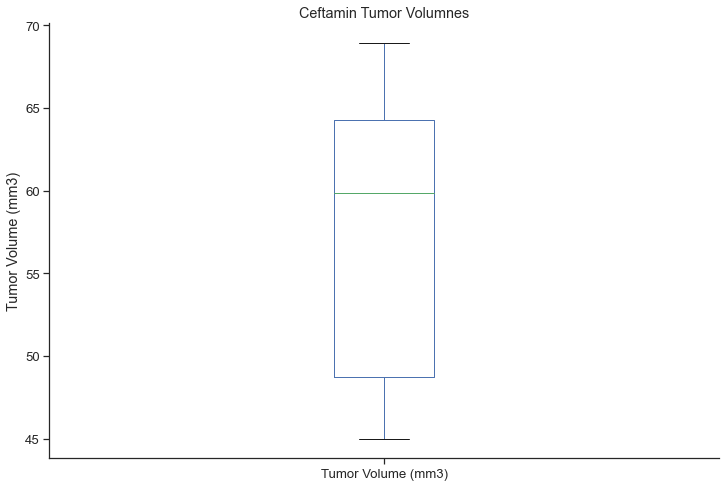

In [31]:
# Ceftamin = [Ceftamin_FinalTumorVolumes_df["Tumor Volume (mm3)"]]
# Ceftamin.sort()
# print(Ceftamin)
fig1, ax1 = plt.subplots()
ax1.set_title('Ceftamin Tumor Volumnes')
ax1.set_ylabel('Tumor Volume (mm3)')
Ceftamin_FinalTumorVolumes_df["Tumor Volume (mm3)"].plot(kind='box')
# ax1.boxplot(Ceftamin)
plt.show()    

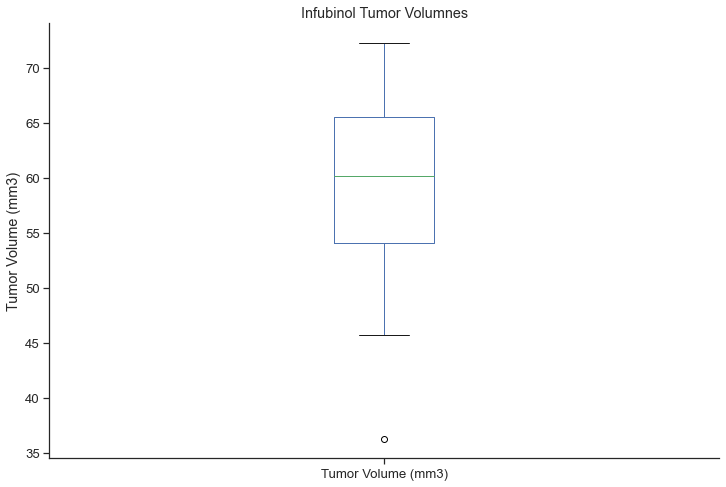

In [32]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# start making the box plots
# Infubinol = [Infubinol_FinalTumorVolumes_df["Tumor Volume (mm3)"]]
# Infubinol.sort()
# print(Ceftamin)
fig1, ax1 = plt.subplots()
ax1.set_title('Infubinol Tumor Volumnes')
ax1.set_ylabel('Tumor Volume (mm3)')
Infubinol_FinalTumorVolumes_df["Tumor Volume (mm3)"].plot(kind='box')
# ax1.boxplot(Ceftamin)
plt.show() 

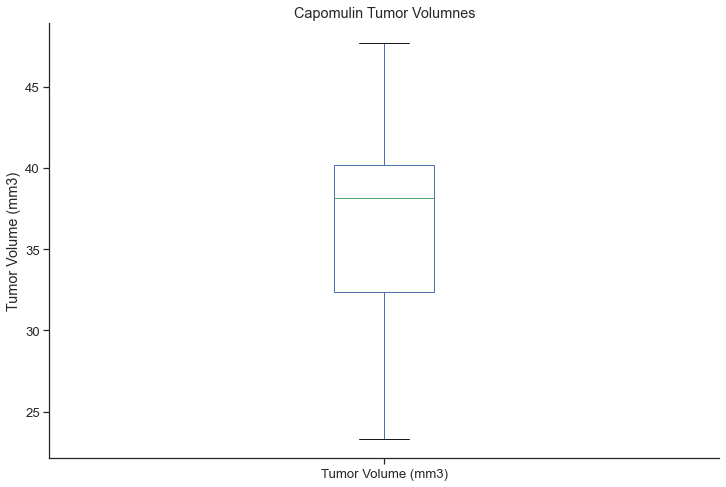

In [33]:
# start making the box plots
# Capomulin = [Capomulin_FinalTumorVolumes_df["Tumor Volume (mm3)"]]
# Capomulin.sort()
# print(Ceftamin)
fig1, ax1 = plt.subplots()
ax1.set_title('Capomulin Tumor Volumnes')
ax1.set_ylabel('Tumor Volume (mm3)')
Capomulin_FinalTumorVolumes_df["Tumor Volume (mm3)"].plot(kind='box')
# ax1.boxplot(Ceftamin)
plt.show() 

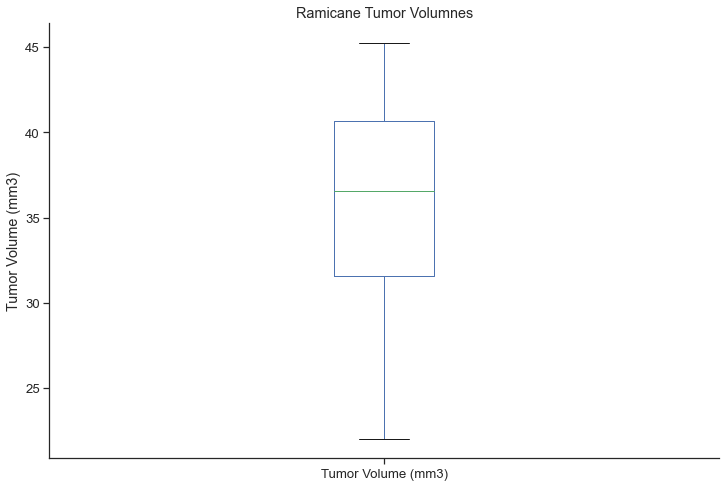

In [34]:
# start making the box plots
# Ramicane = [Ramicane_FinalTumorVolumes_df["Tumor Volume (mm3)"]]
# Ramicane.sort()
# print(Ceftamin)
fig1, ax1 = plt.subplots()
ax1.set_title('Ramicane Tumor Volumnes')
ax1.set_ylabel('Tumor Volume (mm3)')
Ramicane_FinalTumorVolumes_df["Tumor Volume (mm3)"].plot(kind='box')
# ax1.boxplot(Ceftamin)
plt.show() 

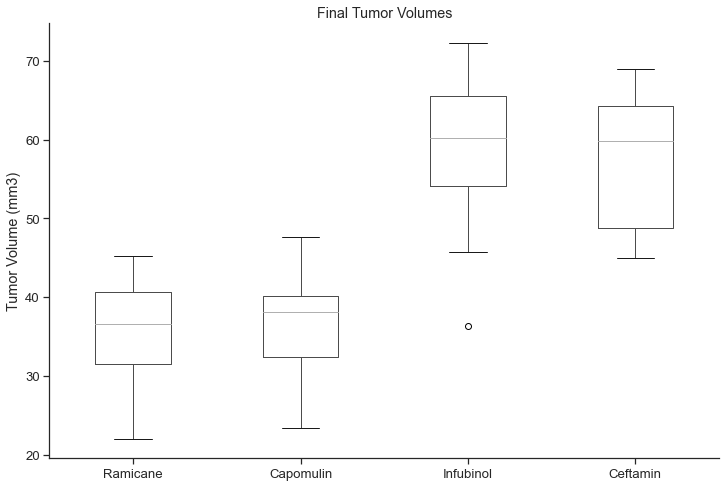

In [35]:
Remerged_FTVs_ForBoxPlots = pd.DataFrame({'Ramicane': Ramicane_FinalTumorVolumes_s,
                                         'Capomulin': Capomulin_FinalTumorVolumes_s,
                                         'Infubinol': Infubinol_FinalTumorVolumes_s,
                                         'Ceftamin' :Ceftamin_FinalTumorVolumes_s
                                         })
Remerged_FTVs_ForBoxPlots
boxplot = Remerged_FTVs_ForBoxPlots.boxplot(column=['Ramicane', 'Capomulin', 'Infubinol','Ceftamin'],grid=False)
boxplot.set_title('Final Tumor Volumes')
boxplot.set_ylabel('Tumor Volume (mm3)');

## Line and Scatter Plots

In [36]:
# PromisingDrugResultsdf
# FindaCapMousedf = PromisingDrugResultsdf.loc[PromisingDrugResultsdf['Drug Regimen'] =='Capomulin', ['Mouse ID','Timepoint','Tumor Volume (mm3)']] # x401
FindaCapMousedf = PromisingDrugResultsdf.loc[(PromisingDrugResultsdf['Drug Regimen'] =='Capomulin') &
                                             (PromisingDrugResultsdf['Mouse ID'] =='x401'),
                                             ['Mouse ID','Timepoint','Tumor Volume (mm3)']]
# FindaCapMousedf

## Line Plot for one Mouse

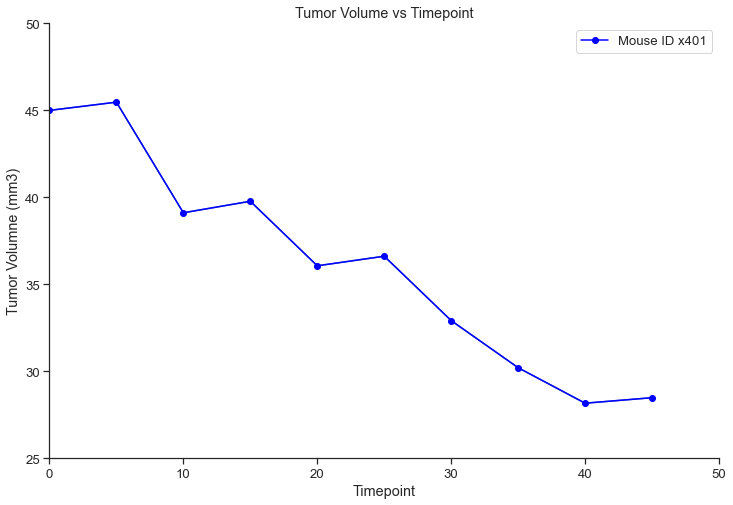

In [37]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Create a graph based upon the list and array we have created
x_axis = FindaCapMousedf['Timepoint']
x_axis
vols = FindaCapMousedf['Tumor Volume (mm3)']
vols
plt.plot(x_axis, vols); # x axis and y values list
# Show the graph that we have created
# Give our graph axis labels
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volumne (mm3)")
plt.title("Tumor Volume vs Timepoint")
# If you Have to plot our chart once again as it doesn't stick after being shown
plt.plot(x_axis, vols, marker ='o', color='blue', label="Mouse ID x401")
# plt.plot(x_axis, e_x, marker='^', color='red', label="legend value")
# plt.hlines(0, 0, 10, alpha=0.25)
# Layers on a legend and sets its location to the lower right
plt.legend(loc="upper right")
plt.xlim(0, 50)
plt.ylim(25, 50)
plt.show();

## Prework for Creating Scatter Plot

In [38]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# DeDuped_mouse_studydf

In [39]:
MouseVolsWghtsDf = DeDuped_mouse_studydf.loc[DeDuped_mouse_studydf['Drug Regimen'] =='Capomulin', ['Mouse ID','Tumor Volume (mm3)','Weight (g)']]
# MouseVolsWghtsDf

In [40]:
PreGrpMouseVolsWghtsDf = MouseVolsWghtsDf[['Mouse ID', 'Tumor Volume (mm3)']]
# PreGrpMouseVolsWghtsDf

In [41]:
AvgTumorVolByMouseIdDf = PreGrpMouseVolsWghtsDf.groupby("Mouse ID").mean()
AvgTumorVolByMouseIdDf2 = AvgTumorVolByMouseIdDf.rename(columns = {'Tumor Volume (mm3)': 'Avg Tumor Volume'})
# AvgTumorVolByMouseIdDf2

In [42]:
# Now merge MouseVolsWghtsDf with AvgTumorVolByMouseIdDf2 on MouseId and keep only the unique rows
MouseVolsAvgWghtsDf = pd.merge(MouseVolsWghtsDf, AvgTumorVolByMouseIdDf2, on=['Mouse ID', 'Mouse ID'])
MouseVolsAvgWghtsDf2 = MouseVolsAvgWghtsDf[['Mouse ID', 'Weight (g)', 'Avg Tumor Volume']]

In [43]:
MouseVolsAvgWghtsDf3 = MouseVolsAvgWghtsDf2.drop_duplicates(keep='first')
# MouseVolsAvgWghtsDf3

## Scatter Plot of Tumor Volume vs Mouse Weight For Capomulin

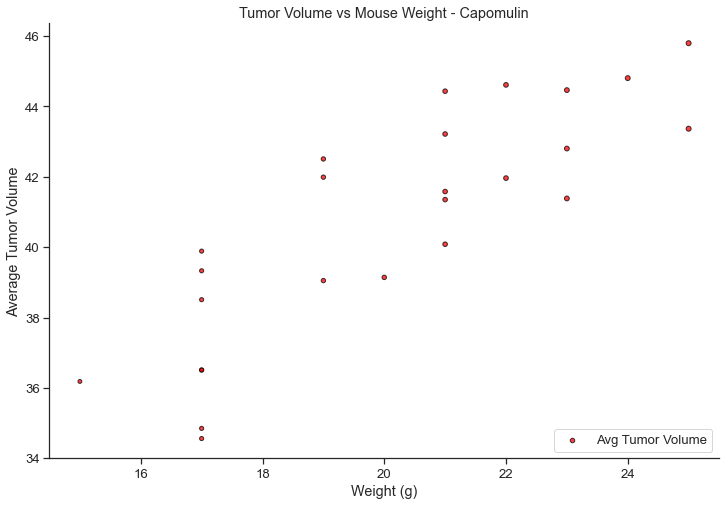

In [44]:
x_axis = MouseVolsAvgWghtsDf3['Weight (g)']
vals = MouseVolsAvgWghtsDf3['Avg Tumor Volume']
plt.scatter(x_axis, vals, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75, label="Avg Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume")
plt.title("Tumor Volume vs Mouse Weight - Capomulin")
plt.legend(loc="lower right")
plt.show()

## Correlation Coefficient

In [45]:
# The next example will compute the Pearson correlation coefficient between "Income per Capita" and "Average Alcohol Consumed"
import scipy.stats as st
correlation = st.pearsonr(x_axis,vals)
print(f"The correlation between Avg Tumor Volume and Weight is {round(correlation[0],2)}")
#print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between Avg Tumor Volume and Weight is 0.84


## Linear Regression model

The r-squared is: 0.7088568047708721


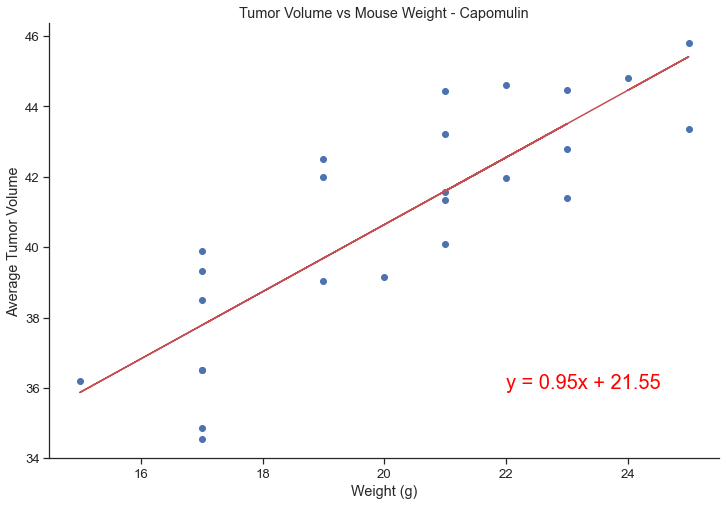

In [46]:
# Add the linear regression equation and line to plot
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, vals)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, vals)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(22,36),fontsize=20,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume")
plt.title("Tumor Volume vs Mouse Weight - Capomulin")
print(f"The r-squared is: {rvalue**2}")
plt.show()